<a href="https://colab.research.google.com/github/NirajShaha/LGMVIPTASK4-DA/blob/main/LGMVIPTASK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>LetsGrowMore Virtual Internship Program (march 2022 - april 2022)</center>

### <center>Author : Niraj Shaha


## Task 4 : Prediction using Decision Tree Algorithm
### Level : Intermediate

In these task, we have to perform classification on the given dataset using Decision Tree Algorithm. Here, we use entropy to make Decision Tree to perform classification on the dataset and also make prediction using the Decision Tree.

<br>

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br>

 ### Loading the Dataset

In [2]:
data =  pd.read_csv("/content/sample_data/Iris_Dataset.csv")

In [3]:
# Looking first 5 rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Looking last 5 rows of the dataset
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


<br>

### Getting the size of the dataset

In [5]:
print("Number of rows in the dataset :", data.shape[0])
print("Number of columns in the dataset :", data.shape[1])

Number of rows in the dataset : 150
Number of columns in the dataset : 6


In [6]:
columns = data.columns.tolist()
print("List of Columns :", columns)

List of Columns : ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


<br>

### Extracting Useful Information

In [7]:
data = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<br>

### Checking for Null Values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values present in the dataset. So <b>no need</b> of handling the null values.

<br>

### Describing the Statistical Measures

In [10]:
data.describe(include = 'all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


<br>

### Visualizing the Data

#### Checking for Count of Species in the Dataset

In [11]:
species_count = data['Species'].value_counts()
labels = species_count.index.tolist()
count = species_count.values.tolist()
species_count.to_frame()

,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


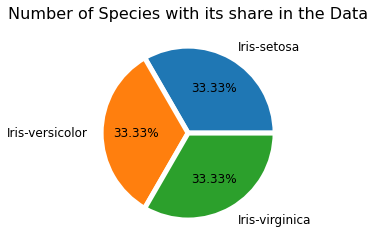

In [12]:
plt.pie(count, labels = labels, labeldistance = 1.15, wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'}, textprops = {'fontsize' : 12}, autopct = "%1.2f%%")
plt.title("Number of Species with its share in the Data", fontsize = 16)
plt.show()

<br>

#### Pair Plot for the Dataset

In these plot, we plotted a relation of each pair of the features present in the Dataset.

<Figure size 1080x432 with 0 Axes>

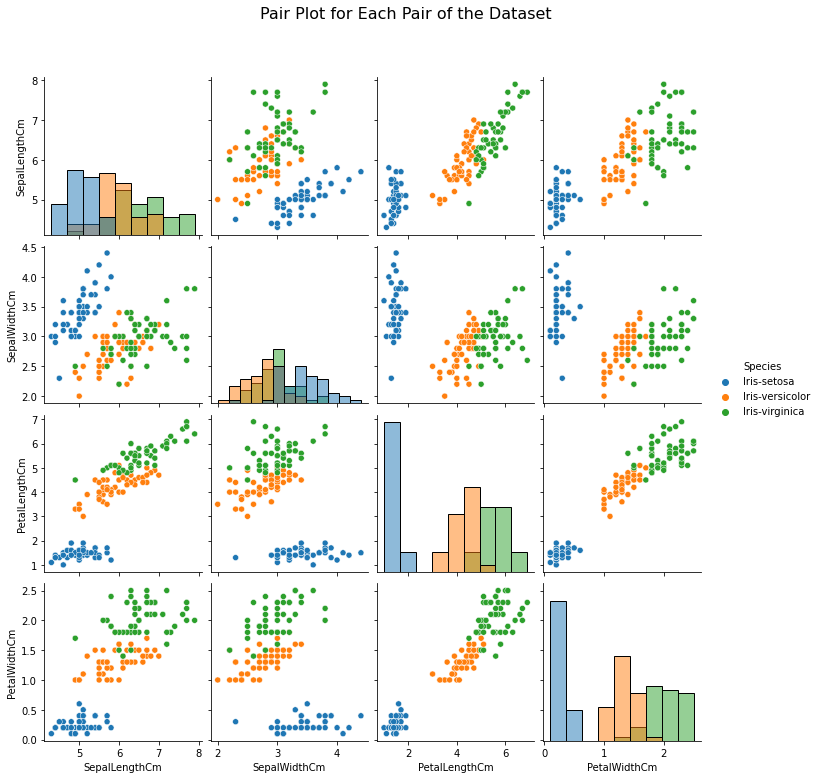

In [13]:
fig =  plt.figure(figsize = (15,6))
visual = sns.pairplot(data, hue =  'Species', diag_kind = 'hist')
visual.fig.suptitle("Pair Plot for Each Pair of the Dataset", y = 1.08, fontsize =  16)
plt.show()

<br>

#### Correlation Heatmap between Features

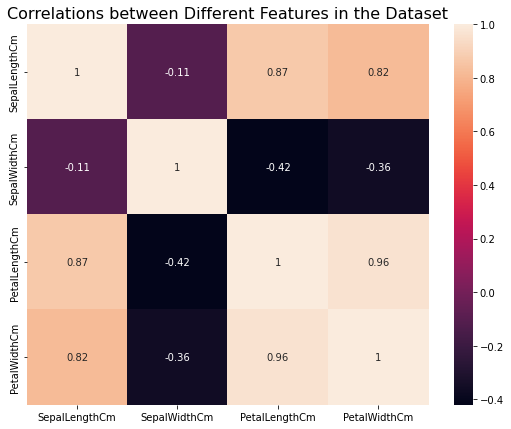

In [14]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlations between Different Features in the Dataset',fontsize =  16)
plt.show()

<br>

### Data Preparation

In [15]:
X = data.iloc[:, 0:4]
X = X.values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [16]:
Y =  (data.iloc[:, 4])
Y = Y.values
Y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

<br>

#### Normalizing the Data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
std =  StandardScaler()
X = std.fit_transform(X)
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

<br>

#### Splitting the Data into Train and Test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size  = 0.3, random_state  =  1)
print("Size of Training Set")
print("X ->", x_train.shape)
print("Y ->", y_train.shape)
print()
print("Size of Test Set")
print("X ->", x_test.shape)
print("Y ->", y_test.shape)
print()

Size of Training Set
X -> (105, 4)
Y -> (105,)

Size of Test Set
X -> (45, 4)
Y -> (45,)



<br>

### Model Development

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
iris_tree =  DecisionTreeClassifier(criterion =  "entropy", max_depth =  4)
iris_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<br>

#### Prediction using the  Created Model

In [23]:
y_pred = iris_tree.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

<br>

### Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
acc_score = accuracy_score(y_test,y_pred)
print("The accuracy of the Decision Tree Algorithm is : ", str(acc_score*100)+ "%")

The accuracy of the Decision Tree Algorithm is :  95.55555555555556%


#### Evaluation using Confusion Matrix

In [26]:
iris_cm = confusion_matrix(y_test, y_pred)
species = data['Species'].unique().tolist()
iris_cm = pd.DataFrame(iris_cm, index = species, columns = species)
iris_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,14,0,0
Iris-versicolor,0,17,1
Iris-virginica,0,1,12


<br>

### Visualizing the Decision Tree

In [27]:
from sklearn.tree import plot_tree

In [28]:
columns = data.columns.tolist()
print(columns)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


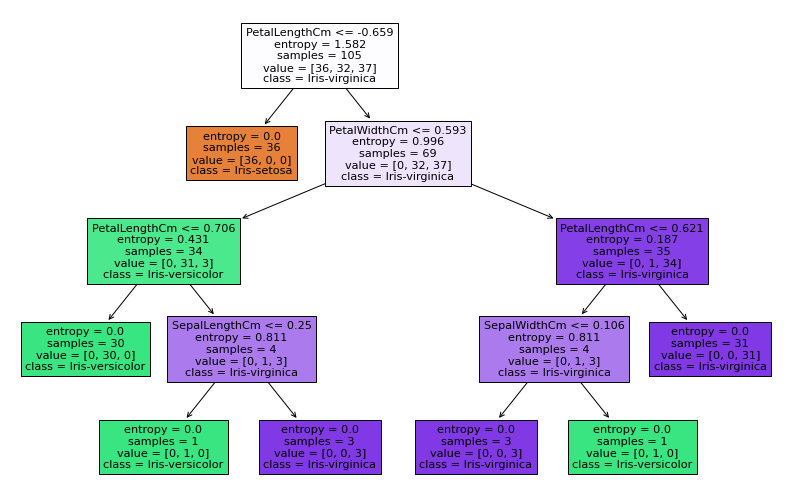

In [29]:
fig = plt.figure(figsize=(14,9))
tree_visual = plot_tree(iris_tree, feature_names = columns,  class_names = species, filled = True)